In [6]:
import sys
sys.path.insert(0, r'../../..')
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
geo_model = gp.create_model('Uncertainty_Hausham_Syncline')

In [8]:
gp.init_data(geo_model, [4483500,4491100.,5287000,5294000.,-1000,1200.],[100,100,100],
            path_o = 'orientations_Uncertainty_Hausham.csv',
            path_i = 'Points_Uncertainty_Hausham.csv', default_values=True);

Active grids: ['regular']


In [9]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,4491092.197,5290571.959,859.718922,0.749585,0.430581,0.542330,Baustein Beds,Default series,1,1,1.000000e-08
1,4485599.701,5289663.717,816.109631,0.387401,0.370690,0.539455,Baustein Beds,Default series,1,1,1.000000e-08
2,4487939.758,5289967.551,772.191961,0.541708,0.390726,0.536559,Baustein Beds,Default series,1,1,1.000000e-08
3,4485904.071,5292733.009,754.799017,0.407471,0.573085,0.535412,Baustein Beds,Default series,1,1,1.000000e-08
4,4490607.253,5293521.794,704.724742,0.717607,0.625099,0.532110,Baustein Beds,Default series,1,1,1.000000e-08


In [10]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
3,4490813.781,5290501.691,905.000000,0.731226,0.425948,0.545316,-2.105686e-01,0.578533,-7.880108e-01,38,160,-1,Baustein Beds,Default series,1,1,0.01
22,4490413.746,5293411.739,714.205592,0.704847,0.617841,0.532735,2.935753e-01,-0.629574,7.193398e-01,44,155,1,Baustein Beds,Default series,1,1,0.01
23,4490909.815,5293564.701,715.000000,0.737559,0.627928,0.532787,1.000094e-12,-0.766044,6.427876e-01,50,180,1,Baustein Beds,Default series,1,1,0.01
0,4484335.990,5290280.297,810.000000,0.304069,0.411349,0.539052,1.000000e-12,1.000000,1.000061e-12,90,0,1,Lower Bunte Molasse,Default series,2,1,0.01
1,4485884.890,5290472.761,767.861201,0.406206,0.424040,0.536273,-3.487824e-02,0.998782,-3.489950e-02,88,178,-1,Lower Bunte Molasse,Default series,2,1,0.01


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Baustein Beds,Default series,1,False,#015482,1
1,Lower Bunte Molasse,Default series,2,False,#9f0052,2
2,Lower Chattian Coal FM,Default series,3,False,#ffbe00,3
3,basement,Basement,1,True,#728f02,4


In [12]:
gp.map_series_to_surfaces(geo_model,
                          {"Molasse": ('Lower Bunte Molasse','Lower Chattian Coal FM','Baustein Beds','basement')},
                          remove_unused_series=True);

In [13]:
geo_model.series

,order_series,BottomRelation
Molasse,1,Erosion


In [14]:
new_colors={'Baustein Beds':'#e8e402', 'Lower Chattian Coal FM':'#9e5f00','Lower Bunte Molasse':'#ff7700','basement':'#000000'}
geo_model.surfaces.colors.change_colors(new_colors)

,surface,series,order_surfaces,isBasement,color,id
0,Baustein Beds,Molasse,1,False,#e8e402,1
1,Lower Bunte Molasse,Molasse,2,False,#ff7700,2
2,Lower Chattian Coal FM,Molasse,3,False,#9e5f00,3
3,basement,Molasse,4,True,#000000,4


In [15]:
geo_model.surfaces.colors.change_colors()

Click to select new colors.


In [16]:
geo_model.grid

Grid Object. Values: 
array([[ 4.483538e+06,  5.287035e+06, -9.890000e+02],
       [ 4.483538e+06,  5.287035e+06, -9.670000e+02],
       [ 4.483538e+06,  5.287035e+06, -9.450000e+02],
       ...,
       [ 4.491062e+06,  5.293965e+06,  1.145000e+03],
       [ 4.491062e+06,  5.293965e+06,  1.167000e+03],
       [ 4.491062e+06,  5.293965e+06,  1.189000e+03]])

In [17]:
%matplotlib inline
gp.plot.plot_data_3D(geo_model)

closing vtk


In [18]:
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_run',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [24]:
gp.get_data(geo_model, 'kriging')

,values
range,10564.1
$C_o$,2.65714e+06
drift equations,[3]
nugget grad,0.01
nugget scalar,1e-06


In [25]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,3
number series,1
number surfaces per series,[3]
len surfaces surface_points,"[8, 5, 7]"
len series surface_points,[20]
len series orientations,[25]


In [26]:
sol = gp.compute_model(geo_model, compute_mesh=False)

In [30]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
7,4.490480e+06,5.291455e+06,865.268260,0.709195,0.488842,0.542696,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
8,4.489042e+06,5.290563e+06,686.379802,0.614423,0.429980,0.530900,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
9,4.488410e+06,5.292425e+06,813.637282,0.572724,0.552786,0.539292,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
10,4.483561e+06,5.290197e+06,812.453788,0.252970,0.405881,0.539214,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
11,4.489872e+06,5.292684e+06,793.041235,0.669136,0.569884,0.537934,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
12,4.485480e+06,5.290271e+06,774.092343,0.379497,0.410766,0.536684,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
13,4.486890e+06,5.290414e+06,759.645416,0.472490,0.420187,0.535731,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
14,4.485459e+06,5.291927e+06,754.924534,0.378101,0.519968,0.535420,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
15,4.489992e+06,5.290469e+06,841.659646,0.677013,0.423794,0.541139,Lower Chattian Coal FM,Molasse,2,1,1.000000e-08
16,4.485775e+06,5.289770e+06,800.183330,0.398976,0.377690,0.538404,Lower Chattian Coal FM,Molasse,2,1,1.000000e-08


In [86]:
import copy
depth = copy.copy(geo_model.surface_points.df['Z'])


In [87]:
d = depth + np.random.normal(0,60, 20)

In [88]:
geo_model.modify_surface_points(geo_model.surface_points.df.index, Z=d)

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
7,4.490480e+06,5.291455e+06,508.561062,0.709195,0.488842,0.519174,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
8,4.489042e+06,5.290563e+06,628.653983,0.614423,0.429980,0.527094,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
9,4.488410e+06,5.292425e+06,547.338990,0.572724,0.552786,0.521731,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
10,4.483561e+06,5.290197e+06,962.302480,0.252970,0.405881,0.549095,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
11,4.489872e+06,5.292684e+06,988.011388,0.669136,0.569884,0.550790,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
12,4.485480e+06,5.290271e+06,727.098816,0.379497,0.410766,0.533585,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
13,4.486890e+06,5.290414e+06,616.624752,0.472490,0.420187,0.526300,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
14,4.485459e+06,5.291927e+06,625.547614,0.378101,0.519968,0.526889,Lower Bunte Molasse,Molasse,1,1,1.000000e-08
15,4.489992e+06,5.290469e+06,831.151974,0.677013,0.423794,0.540447,Lower Chattian Coal FM,Molasse,2,1,1.000000e-08
16,4.485775e+06,5.289770e+06,979.808400,0.398976,0.377690,0.550249,Lower Chattian Coal FM,Molasse,2,1,1.000000e-08


In [46]:
%%timeit
gp.compute_model(geo_model)

10.2 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


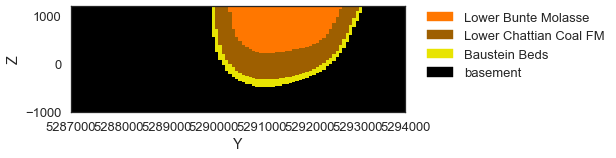

In [34]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=60, show_legend=True,
                    direction='x', show_data=False)

In [16]:
ver, sim = gp.get_surfaces(geo_model)

In [29]:
gp.plot.plot_3D(geo_model)

closing vtk


In [ ]:
gp.save_model(geo_model, path='C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models')